In [1]:
%pip install scikit-learn matplotlib pandas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import ConfusionMatrixDisplay


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# -----------------------------
# Load Iris & split
# -----------------------------
iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

In [3]:
# Q7: Decision Tree
dt_depths = [1, 2, 3] 
for depth in dt_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred_tr = clf.predict(X_train)
    y_pred_te = clf.predict(X_test)
    print(f"Depth={depth} | Train Acc={accuracy_score(y_train, y_pred_tr):.3f}, Test Acc={accuracy_score(y_test, y_pred_te):.3f}")


Depth=1 | Train Acc=0.667, Test Acc=0.667
Depth=2 | Train Acc=0.971, Test Acc=0.889
Depth=3 | Train Acc=0.981, Test Acc=0.978


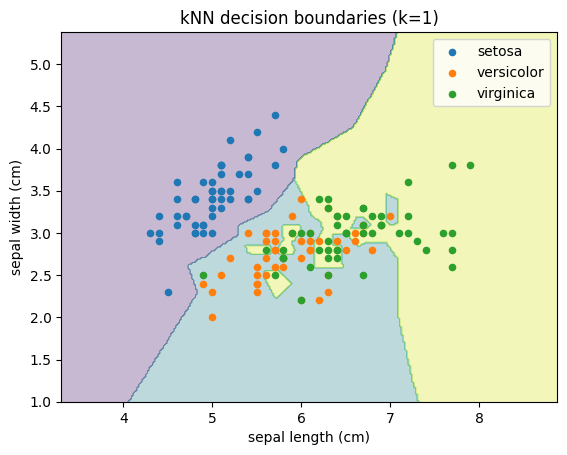

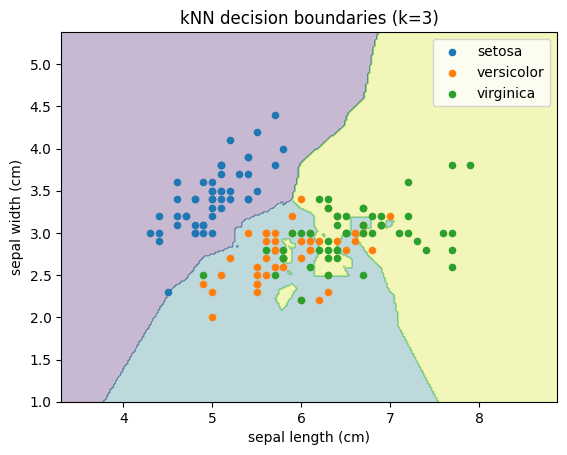

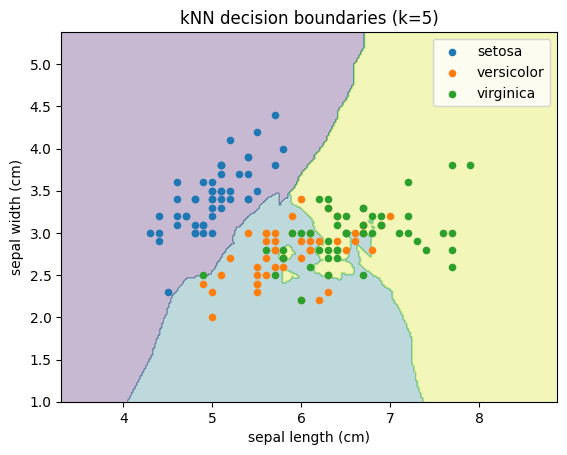

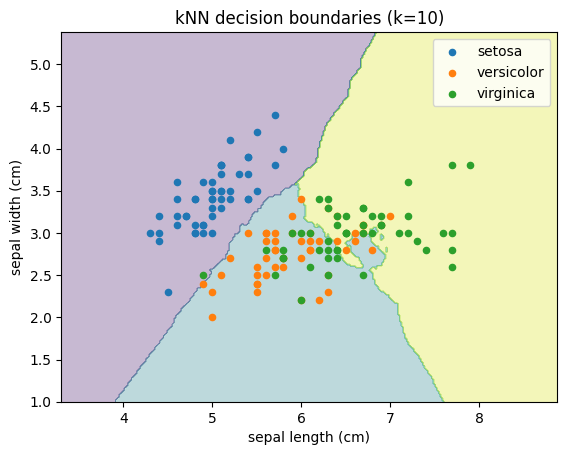

In [4]:
# Q8: kNN with two features
X2 = X[:, :2]  
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y, test_size=0.30, random_state=42, stratify=y
)
def plot_knn_boundaries(k):
    clf = KNeighborsClassifier(n_neighbors=k) 
    clf.fit(X2_train, y2_train) 
    h = 0.02
    x_min, x_max = X2[:, 0].min() - 1.0, X2[:, 0].max() + 1.0
    y_min, y_max = X2[:, 1].min() - 1.0, X2[:, 1].max() + 1.0
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h)) 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    for i, name in enumerate(target_names):
        plt.scatter(X2[y == i, 0], X2[y == i, 1], label=name, s=20) 
    plt.xlabel("sepal length (cm)")
    plt.ylabel("sepal width (cm)")
    plt.title(f"kNN decision boundaries (k={k})")
    plt.legend()
    plt.show()
for k in [1, 3, 5, 10]:
    plot_knn_boundaries(k)


Confusion Matrix:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


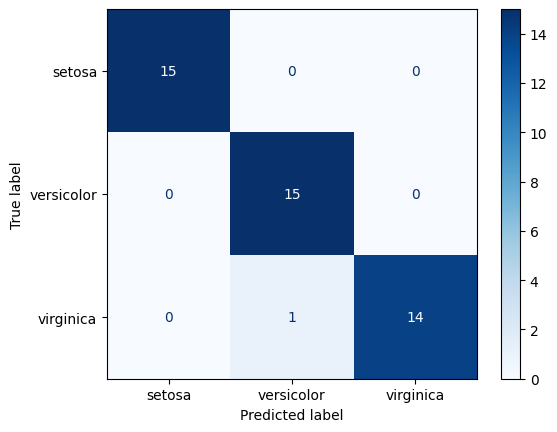


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



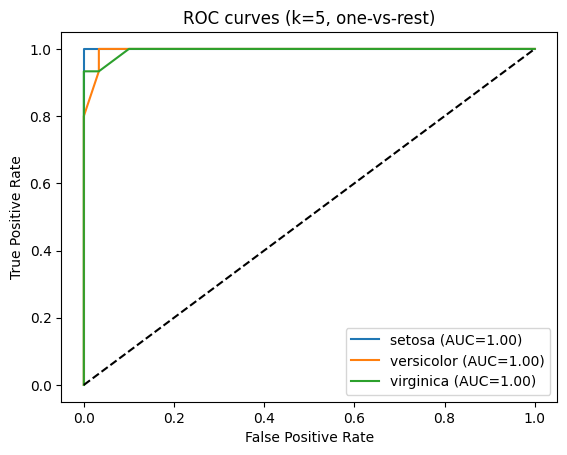

Macro AUC: 0.9970
Micro AUC: 0.9968


In [5]:
# Q9: Performance evaluation (k=5, all features)
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
y_pred = knn5.predict(X_test)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# ROC Curve & AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = knn5.predict_proba(X_test)

plt.figure()
aucs = {}
for i, name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    aucs[name] = roc_auc
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curves (k=5, one-vs-rest)")
plt.legend()
plt.show()

print(f"Macro AUC: {np.mean(list(aucs.values())):.4f}") # average AUC across classes
print(f"Micro AUC: {auc(*roc_curve(y_test_bin.ravel(), y_score.ravel())[:2]):.4f}") # overall AUC
